<a href="https://colab.research.google.com/github/pavel7479/My_a/blob/main/GBP_USD_1H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обработка временных рядов с помощью нейронных сетей

## Понятие автокорреляции

Импортируем необходимые библиотеки:

In [1]:
# Работа с массивами
import numpy as np

# Отрисовка графиков
import matplotlib.pyplot as plt

# Визуальные инструменты Seaborn
import seaborn as sns
sns.set_style('darkgrid')

***Коэффициент автокорреляции Пирсона***

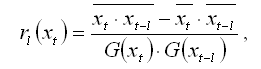

Создадим две переменные:
- x_t – базовый (текущий) временной ряд;
- x_t_1 – базовый временной ряд, но смещенный на 1 шаг вправо.

#Задача: Прогнозирование курса акций Лукойл




##Загрузка библиотек

Загрузим библиотеки из нового TimeseriesGenerator и RepeatVector. Рассмотрим их подробнее уже при применении:

In [2]:
# Работа с массивами
import numpy as np

# Работа с таблицами
import pandas as pd

# Классы-конструкторы моделей нейронных сетей
from tensorflow.keras.models import Sequential, Model

# Основные слои
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, GlobalMaxPooling1D, MaxPooling1D, RepeatVector

# Оптимизаторы
from tensorflow.keras.optimizers import Adam

# Генератор выборки временных рядов
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Нормировщики
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Загрузка датасетов из облака google
import gdown

# Отрисовка графиков
import matplotlib.pyplot as plt

# Отрисовка графики в ячейке colab
%matplotlib inline

# Отключение предупреждений
import warnings
warnings.filterwarnings('ignore')

Опишем параметры вывода графиков:

In [3]:
# Назначение размера и стиля графиков по умолчанию
from pylab import rcParams
plt.style.use('ggplot')
rcParams['figure.figsize'] = (14, 7)

##Загрузка датасета и подготовка данных

###Загрузка данных

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
base_data = pd.read_csv('/content/drive/MyDrive/Forex/GBPUSD_i_M1_202310300015_202311281314.csv')

Посмотрим содержимое таблицы и выведем пример нулевой строки:

In [32]:
# Вывод первых строк таблицы
base_data.head()

,<DATE>\t<TIME>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>
0,2023.10.30\t00:15:00\t1.21173\t1.21175\t1.2117...
1,2023.10.30\t00:16:00\t1.21173\t1.21173\t1.2116...
2,2023.10.30\t00:17:00\t1.21160\t1.21172\t1.2115...
3,2023.10.30\t00:18:00\t1.21170\t1.21170\t1.2115...
4,2023.10.30\t00:19:00\t1.21170\t1.21170\t1.2115...


In [33]:
import pandas as pd

# Замените 'path/to/your/file.csv' на реальный путь к вашему файлу
file_path = '/content/drive/MyDrive/Forex/GBPUSD_i_M1_202310300015_202311281314.csv'

# Чтение данных в DataFrame
df = pd.read_csv(file_path, delimiter=r"\s+", header=None)

# Вывод DataFrame
print(df)


                0         1        2        3        4        5          6  \
0          <DATE>    <TIME>   <OPEN>   <HIGH>    <LOW>  <CLOSE>  <TICKVOL>   
1      2023.10.30  00:15:00  1.21173  1.21175  1.21173  1.21175          7   
2      2023.10.30  00:16:00  1.21173  1.21173  1.21161  1.21161         11   
3      2023.10.30  00:17:00  1.21160  1.21172  1.21156  1.21156          7   
4      2023.10.30  00:18:00  1.21170  1.21170  1.21155  1.21158          8   
...           ...       ...      ...      ...      ...      ...        ...   
30524  2023.11.28  13:10:00  1.26333  1.26337  1.26330  1.26331         27   
30525  2023.11.28  13:11:00  1.26330  1.26330  1.26315  1.26316         22   
30526  2023.11.28  13:12:00  1.26316  1.26341  1.26315  1.26333         31   
30527  2023.11.28  13:13:00  1.26334  1.26336  1.26332  1.26334         12   
30528  2023.11.28  13:14:00  1.26334  1.26335  1.26333  1.26334         11   

           7         8  
0      <VOL>  <SPREAD>  
1          0 

In [34]:
# удалим первую строку
df.drop(index=0, inplace=True)
df

,0,1,2,3,4,5,6,7,8
1,2023.10.30,00:15:00,1.21173,1.21175,1.21173,1.21175,7,0,34
2,2023.10.30,00:16:00,1.21173,1.21173,1.21161,1.21161,11,0,32
3,2023.10.30,00:17:00,1.21160,1.21172,1.21156,1.21156,7,0,15
4,2023.10.30,00:18:00,1.21170,1.21170,1.21155,1.21158,8,0,16
5,2023.10.30,00:19:00,1.21170,1.21170,1.21155,1.21170,14,0,15
...,...,...,...,...,...,...,...,...,...
30524,2023.11.28,13:10:00,1.26333,1.26337,1.26330,1.26331,27,0,31
30525,2023.11.28,13:11:00,1.26330,1.26330,1.26315,1.26316,22,0,31
30526,2023.11.28,13:12:00,1.26316,1.26341,1.26315,1.26333,31,0,29
30527,2023.11.28,13:13:00,1.26334,1.26336,1.26332,1.26334,12,0,31


In [35]:
# Пример данных из нулевой строки
print(base_data.values[0])

['2023.10.30\t00:15:00\t1.21173\t1.21175\t1.21173\t1.21175\t7\t0\t34']


In [6]:
import pandas as pd

# Замените 'path/to/your/file.csv' на реальный путь к вашему файлу
file_path = '/content/drive/MyDrive/Forex/GBPUSD_i_M1_202310300015_202311281314.csv'

# Чтение данных в DataFrame
df = pd.read_csv(file_path, delimiter=r"\s+", header=None)

# # удалим первую строку
# df.drop(index=0, inplace=True)

# # Разбиваем значения в столбце Column1 по \t и создаем новые столбцы
# df[['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Tick Volume', 'Volume 1', 'Volume 2']] = df[0].str.split('\t', expand=True)

# # Удаляем изначальный столбец Column1
# df = df.drop(0, axis=1)

# Разбиваем значения в столбце 0 по \t
split_data = df[0].str.split('\t', expand=True)

# Создаем новые столбцы на основе разделенных значений
columns = ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Tick Volume', 'Volume 1', 'Volume 2']
for col in columns:
    df[col] = split_data.apply(lambda x: x.str.split('\t').str[columns.index(col)] if columns.index(col) < len(x) else None)

# Удаляем изначальный столбец 0
df = df.drop(0, axis=1)



# Выводим результат
print(df)

              1        2        3        4        5          6      7  \
0        <TIME>   <OPEN>   <HIGH>    <LOW>  <CLOSE>  <TICKVOL>  <VOL>   
1      00:15:00  1.21173  1.21175  1.21173  1.21175          7      0   
2      00:16:00  1.21173  1.21173  1.21161  1.21161         11      0   
3      00:17:00  1.21160  1.21172  1.21156  1.21156          7      0   
4      00:18:00  1.21170  1.21170  1.21155  1.21158          8      0   
...         ...      ...      ...      ...      ...        ...    ...   
30524  13:10:00  1.26333  1.26337  1.26330  1.26331         27      0   
30525  13:11:00  1.26330  1.26330  1.26315  1.26316         22      0   
30526  13:12:00  1.26316  1.26341  1.26315  1.26333         31      0   
30527  13:13:00  1.26334  1.26336  1.26332  1.26334         12      0   
30528  13:14:00  1.26334  1.26335  1.26333  1.26334         11      0   

              8        Date  Time  Open  High  Low  Close  Tick Volume  \
0      <SPREAD>      <DATE>   NaN   NaN   NaN  Na

Изучив содержимое таблиц, снова их подгрузим, но уже сразу удалим ненужные столбцы по дате и времени:

Посмотрим размерность получившейся таблицы:

In [40]:
# Проверка формы данных
df.shape

(30529, 17)

In [41]:
# Удаляем столбцы с индексами 0 и 1
df = df.drop(['Date', 'Time', 'Volume 1', 'Volume 2'], axis=1)
df

,1,2,3,4,5,6,7,8,Open,High,Low,Close,Tick Volume
0,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>,NaN,NaN,NaN,NaN,NaN
1,00:15:00,1.21173,1.21175,1.21173,1.21175,7,0,34,NaN,NaN,NaN,NaN,NaN
2,00:16:00,1.21173,1.21173,1.21161,1.21161,11,0,32,NaN,NaN,NaN,NaN,NaN
3,00:17:00,1.21160,1.21172,1.21156,1.21156,7,0,15,NaN,NaN,NaN,NaN,NaN
4,00:18:00,1.21170,1.21170,1.21155,1.21158,8,0,16,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30524,13:10:00,1.26333,1.26337,1.26330,1.26331,27,0,31,NaN,NaN,NaN,NaN,NaN
30525,13:11:00,1.26330,1.26330,1.26315,1.26316,22,0,31,NaN,NaN,NaN,NaN,NaN
30526,13:12:00,1.26316,1.26341,1.26315,1.26333,31,0,29,NaN,NaN,NaN,NaN,NaN
30527,13:13:00,1.26334,1.26336,1.26332,1.26334,12,0,31,NaN,NaN,NaN,NaN,NaN


###Иллюстрация данных в графическом виде

Выведем данные для дальнейшей работы. Данные будут отображаться с позиции с номером `start`, длиной `length` отчетов. Отрисуем четыре линии со значениями OPEN, MIN, MAX, CLOSE и гистограммы по объему продаж:


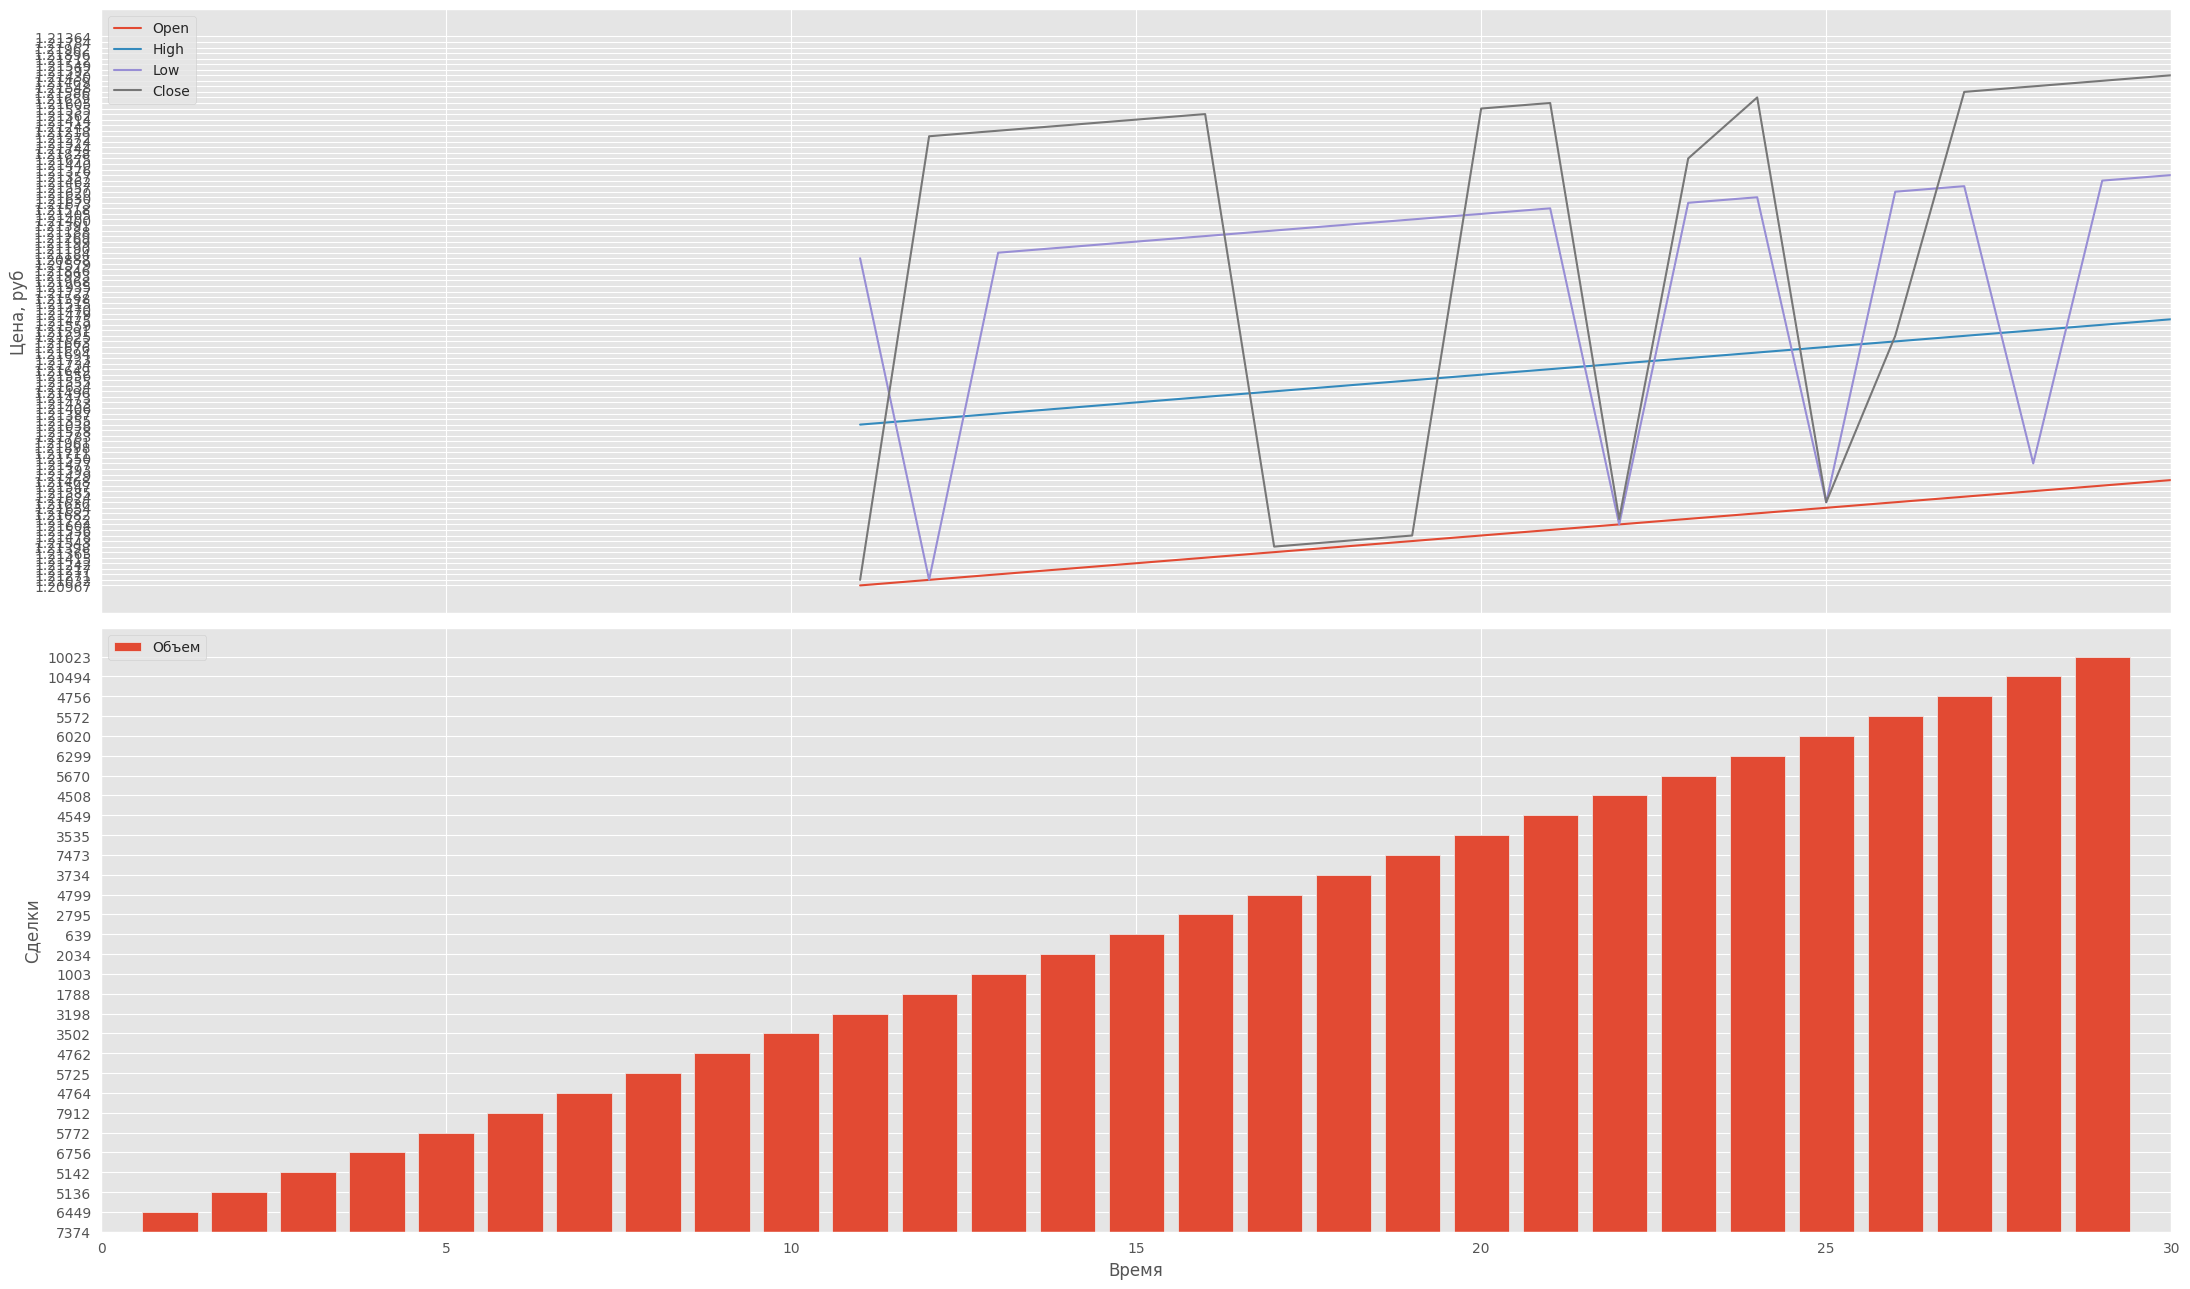

In [14]:
# Отображение исходных данных от точки start и длиной length
start = 10
length = 30

# Задание полотна для графиков - два подграфика один под другим с общей осью x
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 13), sharex=True)
CHANNEL_NAMES = ['Open', 'High', 'Low', 'Close']
CHANNEL_INDEX = {'Open': 0, 'High': 1, 'Low': 2, 'Close': 3, 'Tick Volume': 4}

# Четыре основных канала - open, max, min, close
for chn in range(4):
    # Отрисовка одного канала данных
    # От начальной точки start длиной length
    ax1.plot(df.index[start:start + length],  # Обратите внимание на использование df.index
             df.iloc[start:start + length, chn],  # Используйте .iloc для индексации DataFrame
             label=CHANNEL_NAMES[chn])
ax1.set_ylabel('Цена, руб')
ax1.legend()

# Канал volume (объем)
ax2.bar(x=np.arange(length),
        height=df.iloc[start:start + length, CHANNEL_INDEX['Tick Volume']],
        label='Объем')
ax2.set_ylabel('Сделки')
ax2.legend()

plt.xlabel('Время')
# Регулировка пределов оси x
plt.xlim(0, length)
# Указание расположить подграфики плотнее друг к другу
plt.tight_layout()
# Фиксация графика
plt.show()


Теперь подготовим выборки. Вспомним теорию начала урока. Возьмем 100 элементов в x_train, 101 элемент в y_train и так далее. Чтобы не делать этого вручную, воспользуемся инструментом TimeseriesGenerator.


### Знакомство с **TimeseriesGenerator**

Основные параметры для TimeseriesGenerator:
- x_train – временной ряд, из которого собираются данные.
- y_train – целевые значения. Должны быть той же длины что и x_train.
- length – длина выходных последовательностей, окно, которым вы пройдетесь по данным.
- sampling_rate – размер шага при выборке данных в x_train. Если x_train последовательность от 0 до 50, то при rate=1 последовательность выглядит так:

        [0, 1, 2, 3, 4].
При rate=2 в последовательность попадет каждый второй элемент:

        [0, 2, 4, 6, 8]
и так далее.

- stride – указывает, на сколько элементов произойдет сдвиг при смене элемента. У того же x_train при stride=1 первый и второй элемент выглядят так:
        
        [0, 1, 2, 3, 4, 5] [1, 2, 3, 4, 5, 6].
        
        При stride=2:

        [0, 1, 2, 3, 4, 5] [2, 3, 4, 5, 6, 7].

- batch_size – сколько элементов вернет генератор при обращении к нему.
Теперь, когда основные параметры понятны, перейдите к практике. Для этого опишите функцию с генератором и выводом информации на экран.


In [15]:
# Функция создания пробного генератора и вывода его результатов на экран
# На входе - имитация выборок x_train, y_train
def show_gen(x_train, y_train, length=10, batch_size=5):
    # Создание генератора TimeseriesGenerator
    gen = TimeseriesGenerator(x_train,
                              y_train,
                              length=length,
                              sampling_rate=1,
                              stride=1,
                              batch_size=batch_size
                             )

    # Прохождение по элементам генератора (батчам) в цикле и вывод каждого батча
    for i, g in enumerate(gen):
        print('Батч №', i)
        print('x_train:\n', g[0])
        print('y_train:\n', g[1])
        print()

Создадим последовательность от 0 до 50:

### Подготовка выборок данных для нейросети




In [19]:
# Словарь каналов данных с их индексами
print(CHANNEL_INDEX)

{'Open': 0, 'High': 1, 'Low': 2, 'Close': 3, 'Tick Volume': 4}


Установим гиперпараметры, отберем входные и выходные параметры. 300 отчетов, 30 тысяч примеров пойдут в проверочную выборку:

In [ ]:
# Задание гиперпараметров

CHANNEL_X = CHANNEL_NAMES                 # Отбор каналов входных данных
CHANNEL_Y = ['Close']                     # Отбор каналов данных для предсказания
SEQ_LEN = 300                             # Длина прошедших данных для анализа
BATCH_SIZE = 20                           # Объем батча для генератора
TEST_LEN = 30000                          # Объем тестовой выборки
TRAIN_LEN = data.shape[0] - TEST_LEN      # Объем обучающей выборки

Определим, какие данные пойдут в выборки. Разделим основной набор данных на обучающую и тестовую выборки. Обязательно нормируем данные. То же самое сделаем с выходными данными. При помощи генератора создадим выборки для обучения и проверки:

In [ ]:
# Формирование списков индексов каналов данных для входных и выходных выборок
chn_x = [CHANNEL_INDEX[c] for c in CHANNEL_X]
chn_y = [CHANNEL_INDEX[c] for c in CHANNEL_Y]

# Проверка результата
print(chn_x, chn_y)

# Разделение данных на тренировочный и тестовый наборы
# 2*SEQ_LEN - для разрыва между тренировочными и тестовыми данными
# варьируемый параметр, страховка от пересечения
data_train, data_test = data[:TRAIN_LEN], data[TRAIN_LEN + 2*SEQ_LEN:]

# Отбор входных данных
x_data_train, x_data_test = data_train[:, chn_x], data_test[:, chn_x]

# Масштабирование данных
x_scaler = MinMaxScaler()
x_scaler.fit(x_data_train)
x_data_train = x_scaler.transform(x_data_train)
x_data_test = x_scaler.transform(x_data_test)

# Отбор выходных данных
y_data_train, y_data_test = data_train[:, chn_y], data_test[:, chn_y]

# Масштабирование данных
y_scaler = MinMaxScaler()
y_scaler.fit(y_data_train)
y_data_train = y_scaler.transform(y_data_train)
y_data_test = y_scaler.transform(y_data_test)

# Проверка формы данных
print(f'Train data: {x_data_train.shape}, {y_data_train.shape}')
print(f'Test  data: {x_data_test.shape}, {y_data_test.shape}')

# Создание генератора для обучения
train_datagen = TimeseriesGenerator(x_data_train,
                                    y_data_train,
                                    length=SEQ_LEN,
                                    stride=1,
                                    sampling_rate=1,
                                    batch_size=BATCH_SIZE)

# Аналогичный генератор для валидации при обучении
val_datagen = TimeseriesGenerator(x_data_test,
                                  y_data_test,
                                  length=SEQ_LEN,
                                  stride=1,
                                  sampling_rate=1,
                                  batch_size=BATCH_SIZE)

# Проверка формы выдаваемого генератором результата
print(f'Train batch x: {train_datagen[0][0].shape}, y: {train_datagen[0][1].shape}')

[0, 1, 2, 3, 4] [3]
Train data: (451872, 5), (451872, 1)
Test  data: (29400, 5), (29400, 1)
Train batch x: (20, 300, 5), y: (20, 1)


Не забудем про тестовую выборку. Также при помощи генератора сформируем окончательные тестовые выборки:

In [ ]:
# Генератор тестовой выборки, генерирует один батч на всю выборку
test_datagen = TimeseriesGenerator(x_data_test,
                                   y_data_test,
                                   length=SEQ_LEN,
                                   stride=1,
                                   sampling_rate=1,
                                   batch_size=x_data_test.shape[0])

# Формирование тестовой выборки из генератора
x_test, y_test = test_datagen[0]

# Проверка формы тестовой выборки
print(f'Test x: {x_test.shape}, y: {y_test.shape}')

Test x: (29100, 300, 5), y: (29100, 1)


##Различные архитектуры нейронных сетей для обработки временных рядов

### Сервисные функции


Опишем сервисные функции, которые упростят дальнейшие эксперименты с архитектурами НС:
- `get_pred()` – обученная модель. Предсказывает результат, который возвращается к ненормированным данным;
- `correlate()` – расчет коэффициента автокорреляции;
- `show_predict()` – построение графиков предсказания и верных ответов;
- `show_corr()` – построение графика автокорреляции;
- `eval_net()` – объединяет предыдущие функции и показывает результаты обучения сети;
- `train_eval_net()` – процесс обучения сети и вывод ее результатов. В обучении модели подаются не отдельные выборки, а сразу генераторы, так как они дают тот же результат, что и отдельные выборки. При этом уже нет необходимости прописывать размер батча обучения, поскольку он прописан в самом генераторе.

In [ ]:
# Функция расчета результата прогнозирования сети (предсказания)

def get_pred(model, # модель
             x_test, y_test, # тестовая выборка
             y_scaler): # масштабирующий объект для y

    # Вычисление и деномализация предсказания
    y_pred_unscaled = y_scaler.inverse_transform(model.predict(x_test))

    # Денормализация верных ответов
    y_test_unscaled = y_scaler.inverse_transform(y_test)

    # Возврат результата предсказания и верные ответы в исходном масштабе
    return y_pred_unscaled, y_test_unscaled

In [ ]:
# Функция расчета корреляционного коэффициента Пирсона для двух рядов

def correlate(a, b):
    return np.corrcoef(a, b)[0, 1]


In [ ]:
# Функция визуализации результата предсказания сети и верных ответов

def show_predict(y_pred, y_true, # прогноз данных и исходный ряд
                 start, # точка ряда, с которой начинается отрисовка графика
                 length, # количество точек для отрисовки графика
                 chn_list=None, # список каналов данных для отрисовки (по умолчанию все)
                 chn_names=CHANNEL_Y, # список имен каналов данных
                 title=''):

    # Если список каналов пуст - отображаются все каналы
    if not chn_list:
        chn_list = list(range(y_true.shape[1]))

    # Построение графика по всем каналам данных
    plt.figure(figsize=(22, 6))

    for chn in chn_list:
        plt.plot(y_pred[start:start + length, chn],
                label=f'{chn_names[chn]} Прогноз')
        plt.plot(y_true[start:start + length, chn],
                label=f'{chn_names[chn]} Базовый')

    plt.title(title)
    plt.xlabel('Время')
    plt.ylabel('Данные')
    plt.legend()
    plt.show()

In [ ]:
# Функция рисования корреляций прогнозного ряда и исходного со смещением

def show_corr(y_pred, y_true, # прогноз данных и исходный ряд
              back_steps_max=30, # максимальное количество шагов смещения назад по времени
              chn_list=None, # список каналов данных для отрисовки (по умолчанию все)
              chn_names=CHANNEL_Y,
              title=''): # список имен каналов данных

    # Если список каналов пуст - отображаются все каналы
    if not chn_list:
        chn_list = list(range(y_true.shape[1]))

    y_len = y_true.shape[0]
    steps = range(0, back_steps_max + 1)

    # Построение графика по всем каналам данных
    plt.figure(figsize=(14, 7))

    for chn in chn_list:
        # Вычисление коэффициентов корреляции базового ряда и предсказания с разным смещением
        cross_corr = [correlate(y_true[:y_len - step, chn], y_pred[step:, chn]) for step in steps]
        # Вычисление коэффициентов автокорреляции базового ряда с разным смещением
        auto_corr = [correlate(y_true[:y_len - step, chn], y_true[step:, chn]) for step in steps]

        plt.plot(cross_corr, label=f'{chn_names[chn]} Прогноз')
        plt.plot(auto_corr, label=f'{chn_names[chn]} Эталон')

    plt.title(title)

    # Назначение меток шкалы оси x
    plt.xticks(steps)
    plt.xlabel('Шаги смещения')
    plt.ylabel('Коэффициент корреляции')
    plt.legend()
    plt.show()

In [ ]:
# Функция визуализации результата работы сети

def eval_net(model, # модель
             x_test, y_test, # тестовая выборка
             y_scaler, # нормировщик выхода
             start=0, length=500, back_steps_max=30, # параметры отображения графиков
             title=''):

    # Получение денормализованного предсказания и данных базового ряда
    y_pred, y_true = get_pred(model, x_test, y_test, y_scaler)

    # Отрисовка графика сопоставления базового и прогнозного рядов
    # Прогнозный ряд сдвигается на 1 шаг назад, так как предсказание делалось на 1 шаг вперед
    show_predict(y_pred[1:], y_true[:-1], start, length,
                 title=f'{title}: Сопоставление базового и прогнозного рядов')
    # Отрисовка графика корреляционных коэффициентов до заданного максимума шагов смещения
    show_corr(y_pred, y_true, back_steps_max=back_steps_max,
              title=f'{title}: Корреляционные коэффициенты по шагам смещения')

In [ ]:
# Функция обучения модели и отрисовки прогресса и оценки результатов

def train_eval_net(model, # модель
                   train_datagen, val_datagen, # генераторы обучающей и проверочной выборок
                   epoch_list, # список эпох в виде [(epochs1, opt1), (epochs2, opt2), ...]
                   x_test, y_test,
                   y_scaler,
                   start=0,
                   length=500,
                   back_steps_max=30,
                   title=''):

    # Отображение сводки модели
    model.summary()

    # Обучение модели в несколько фаз в соответствии со списком epoch_list
    for epochs, opt in epoch_list:
        # Компиляция модели
        model.compile(loss='mse', optimizer=opt)
        # Фаза обучения модели
        print(f'Обучение {epochs} эпох')
        history = model.fit(train_datagen,
                            epochs=epochs,
                            validation_data=val_datagen,
                            verbose=1)

        # Рисование графиков прошедшей фазы обучения
        fig = plt.figure(figsize=(14, 7))
        plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
        plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
        plt.title(f'{title}: График прогресса обучения')
        # Указание показывать только целые метки шкалы оси x
        fig.gca().xaxis.get_major_locator().set_params(integer=True)
        plt.xlabel('Эпоха обучения')
        plt.ylabel('Средняя ошибка')
        plt.legend()
        plt.show()

        # Рисование графиков оценки результата работы модели после фазы обучения
        eval_net(model, x_test, y_test, y_scaler, start=start,
                 length=length, back_steps_max=back_steps_max, title=title)

Далее пойдут эксперименты. Рассмотрим некоторые особенности:
- В train_eval_net() обучение запускается в цикле по списку эпох, который передается в функцию `epoch_list`. Так можно менять количество эпох и шаг обучения, не прописывая лишние строчки кода.
- Как видим, все архитектуры имеют склонность к автокорреляции и возможности роста результативности. Возможно, потребуется добавить обработку тренда.
- В целом задача предсказания точной цены закрытия акций не всегда логична. Чаще всего НС используют для предсказания, будет ли цена расти или падать в следующем периоде. Данную задачу мы рассмотрим в следующем блоке практической части урока.


### Полносвязная сеть

#### Исследование №1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300, 150)          900       
_________________________________________________________________
flatten (Flatten)            (None, 45000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 45001     
Total params: 45,901
Trainable params: 45,901
Non-trainable params: 0
_________________________________________________________________
Обучение 50 эпох
Epoch 1/50
22579/22579 [==============================] - 50s 2ms/step - loss: 5.8650e-04 - val_loss: 2.6420e-04
Epoch 2/50
22579/22579 [==============================] - 48s 2ms/step - loss: 5.9902e-05 - val_loss: 1.7306e-05
Epoch 3/50
22579/22579 [==============================] - 47s 2ms/step - loss: 3.7392e-05 - val_loss: 3.3112e-05
Epoch 4/50
22579/22579 [==

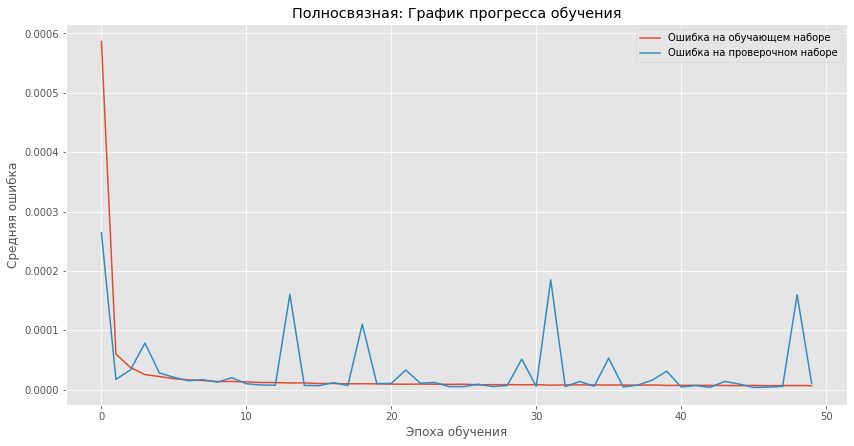

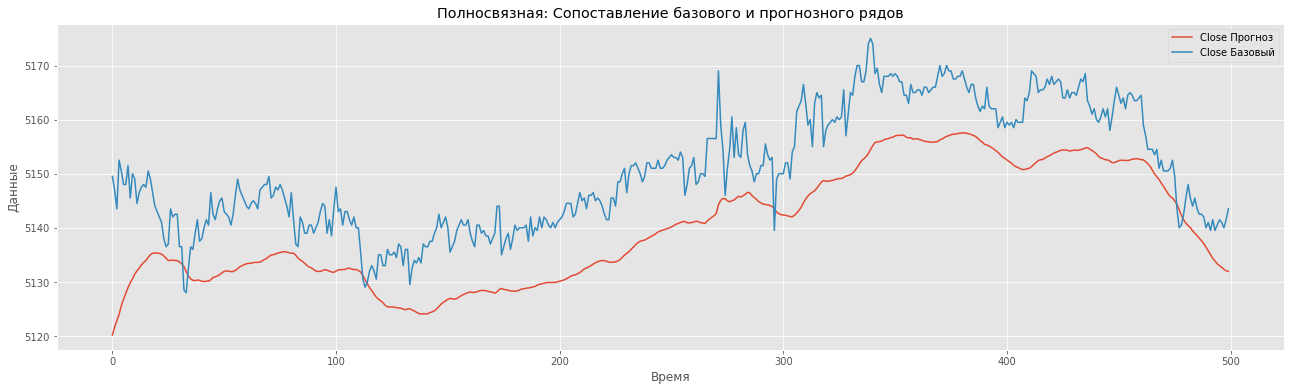

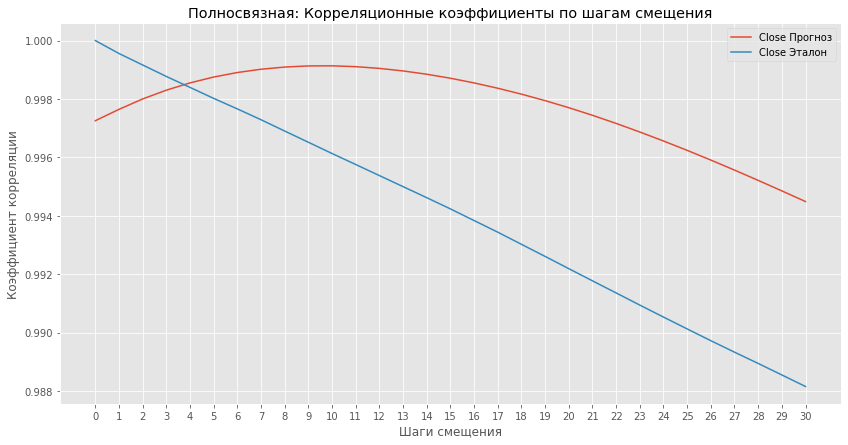

Обучение 50 эпох
Epoch 1/50
22579/22579 [==============================] - 48s 2ms/step - loss: 2.4863e-06 - val_loss: 3.6009e-06
Epoch 2/50
22579/22579 [==============================] - 48s 2ms/step - loss: 2.4865e-06 - val_loss: 3.9164e-06
Epoch 3/50
22579/22579 [==============================] - 48s 2ms/step - loss: 2.4865e-06 - val_loss: 3.4793e-06
Epoch 4/50
22579/22579 [==============================] - 48s 2ms/step - loss: 2.4676e-06 - val_loss: 7.7631e-06
Epoch 5/50
22579/22579 [==============================] - 48s 2ms/step - loss: 2.4578e-06 - val_loss: 3.6271e-06
Epoch 6/50
22579/22579 [==============================] - 47s 2ms/step - loss: 2.4464e-06 - val_loss: 3.8101e-06
Epoch 7/50
22579/22579 [==============================] - 48s 2ms/step - loss: 2.4409e-06 - val_loss: 4.8849e-06
Epoch 8/50
22579/22579 [==============================] - 48s 2ms/step - loss: 2.4303e-06 - val_loss: 5.8800e-06
Epoch 9/50
22579/22579 [==============================] - 47s 2ms/step - loss: 

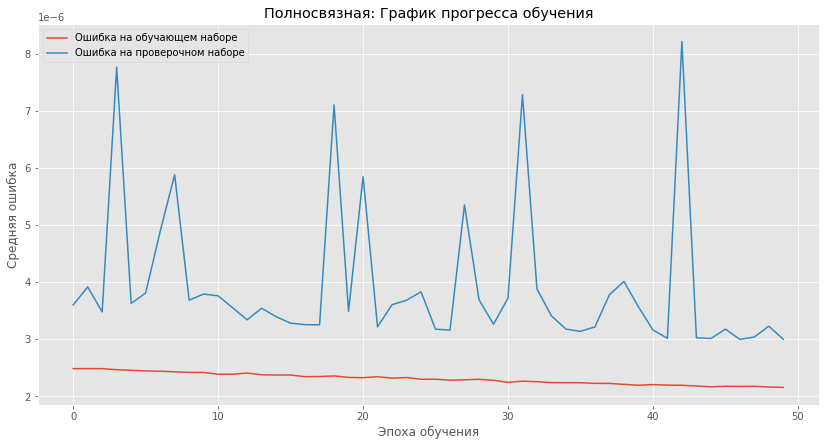

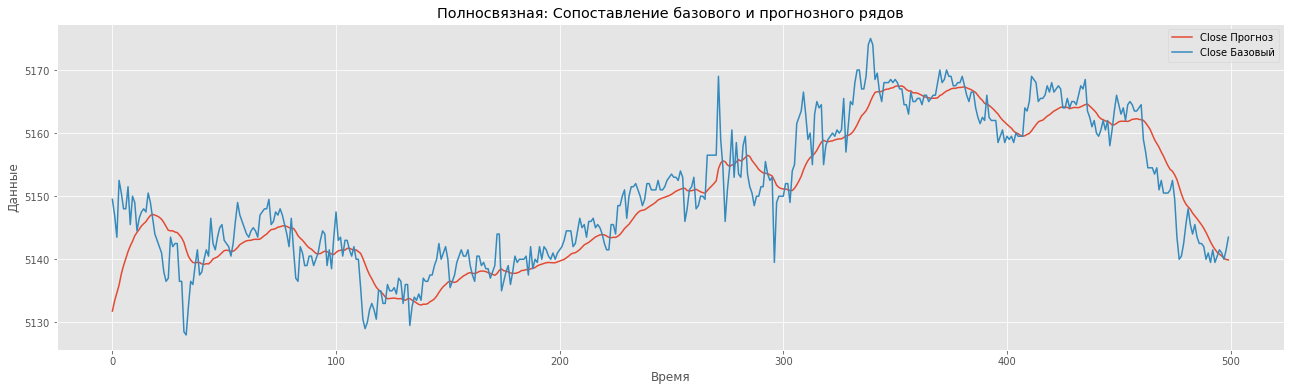

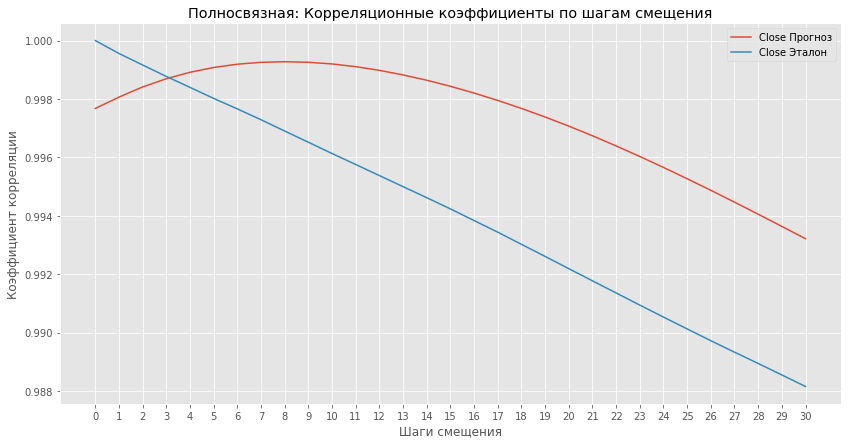

Обучение 50 эпох
Epoch 1/50
22579/22579 [==============================] - 48s 2ms/step - loss: 1.9322e-06 - val_loss: 2.9421e-06
Epoch 2/50
22579/22579 [==============================] - 48s 2ms/step - loss: 1.9302e-06 - val_loss: 2.9443e-06
Epoch 3/50
22579/22579 [==============================] - 48s 2ms/step - loss: 1.9306e-06 - val_loss: 2.9338e-06
Epoch 4/50
22579/22579 [==============================] - 48s 2ms/step - loss: 1.9314e-06 - val_loss: 2.9379e-06
Epoch 5/50
22579/22579 [==============================] - 48s 2ms/step - loss: 1.9301e-06 - val_loss: 2.9320e-06
Epoch 6/50
22579/22579 [==============================] - 48s 2ms/step - loss: 1.9278e-06 - val_loss: 3.1068e-06
Epoch 7/50
22579/22579 [==============================] - 48s 2ms/step - loss: 1.9271e-06 - val_loss: 3.3312e-06
Epoch 8/50
22579/22579 [==============================] - 48s 2ms/step - loss: 1.9277e-06 - val_loss: 2.9456e-06
Epoch 9/50
22579/22579 [==============================] - 48s 2ms/step - loss: 

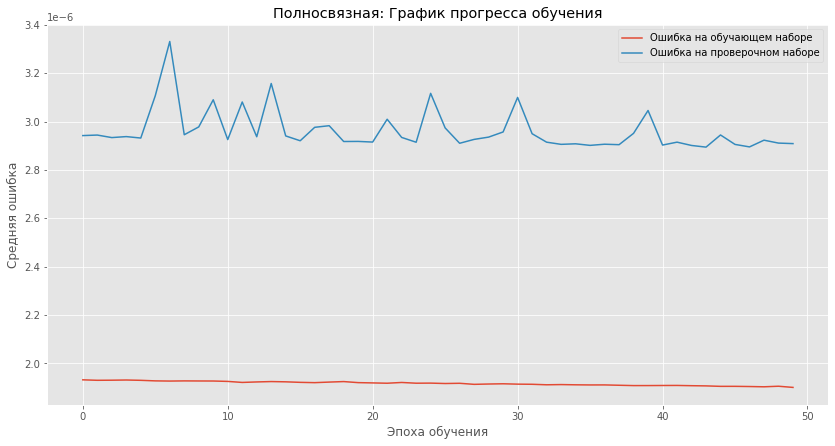

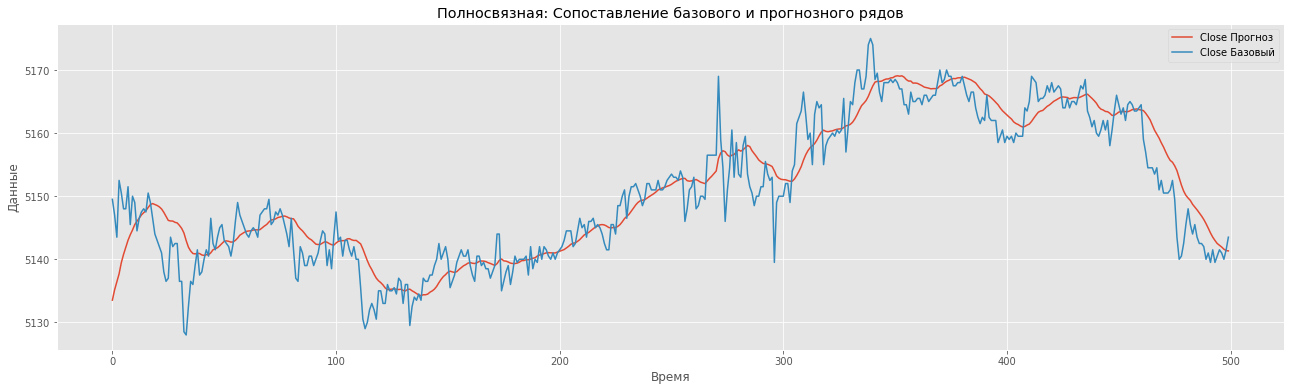

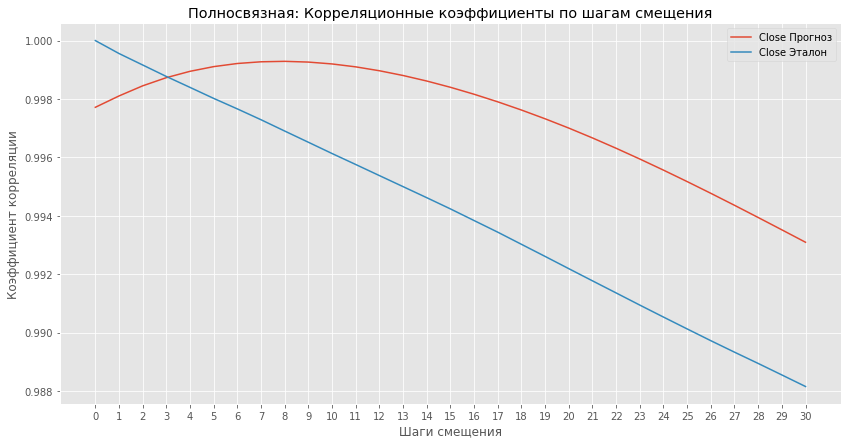

In [ ]:
# Простая полносвязная сеть
model_dense = Sequential()
model_dense.add(Dense(150, input_shape=x_test.shape[1:], activation='relu'))
model_dense.add(Flatten())
model_dense.add(Dense(y_test.shape[1], activation='linear'))

# Обучение модели 3x50 эпох
train_eval_net(model_dense, train_datagen, val_datagen, [(50, Adam(lr=1e-4)),
                                                         (50, Adam(lr=1e-5)),
                                                         (50, Adam(lr=1e-6))],
               x_test, y_test, y_scaler, title='Полносвязная')

**Вывод:** даже при небольшом наборе параметров и простоте архитектуры, сеть достаточно точно предсказывает значение, но это значение не является вполне корректным, так как график автокорреляции показывает, что график предсказания и реального значения имеют зависимость, т.е. нейронка предсказывает то, что было несколько шагов назад.

#### Исследование №2

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1500)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               225150    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 151       
Total params: 225,301
Trainable params: 225,301
Non-trainable params: 0
_________________________________________________________________
Обучение 20 эпох
Epoch 1/20
22579/22579 [==============================] - 41s 2ms/step - loss: 0.0057 - val_loss: 2.4613e-05
Epoch 2/20
22579/22579 [==============================] - 41s 2ms/step - loss: 9.7966e-04 - val_loss: 2.6699e-04
Epoch 3/20
22579/22579 [==============================] - 41s 2ms/step - loss: 3.7683e-04 - val_loss: 1.6518e-05
Epoch 4/20
22579/22579 [==

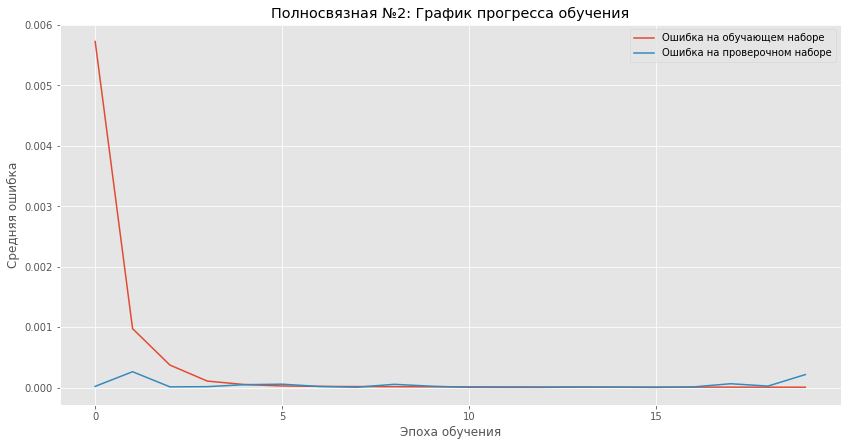

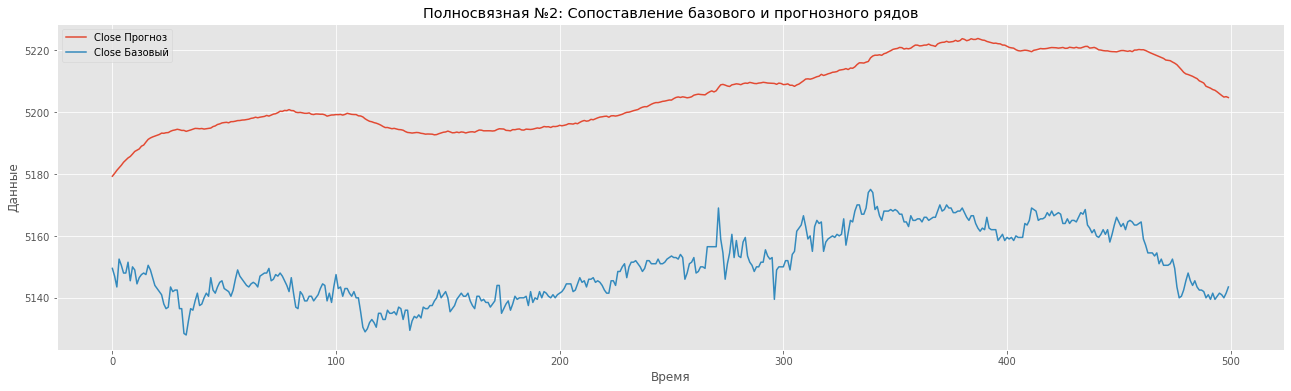

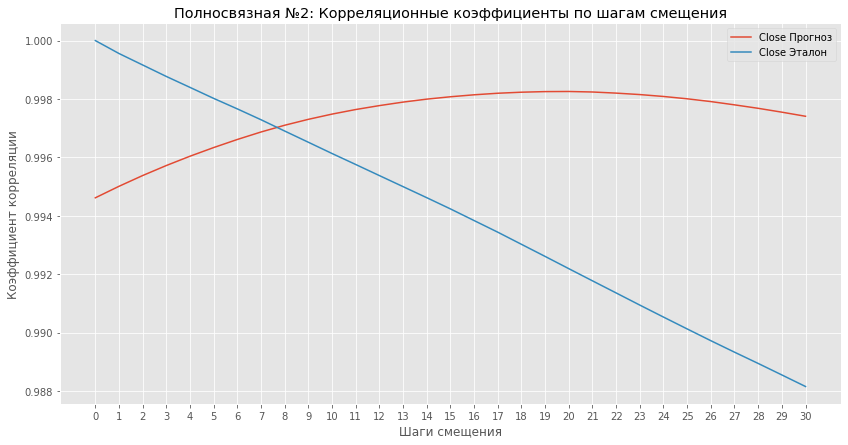

Обучение 20 эпох
Epoch 1/20
22579/22579 [==============================] - 42s 2ms/step - loss: 4.6611e-06 - val_loss: 7.1690e-06
Epoch 2/20
22579/22579 [==============================] - 42s 2ms/step - loss: 4.5659e-06 - val_loss: 1.3491e-05
Epoch 3/20
22579/22579 [==============================] - 43s 2ms/step - loss: 4.5196e-06 - val_loss: 7.4323e-06
Epoch 4/20
22579/22579 [==============================] - 42s 2ms/step - loss: 4.4501e-06 - val_loss: 6.4135e-06
Epoch 5/20
22579/22579 [==============================] - 42s 2ms/step - loss: 4.4272e-06 - val_loss: 6.3552e-06
Epoch 6/20
22579/22579 [==============================] - 42s 2ms/step - loss: 4.3483e-06 - val_loss: 7.0376e-06
Epoch 7/20
22579/22579 [==============================] - 41s 2ms/step - loss: 4.3269e-06 - val_loss: 6.8598e-06
Epoch 8/20
22579/22579 [==============================] - 42s 2ms/step - loss: 4.3098e-06 - val_loss: 8.0706e-06
Epoch 9/20
22579/22579 [==============================] - 42s 2ms/step - loss: 

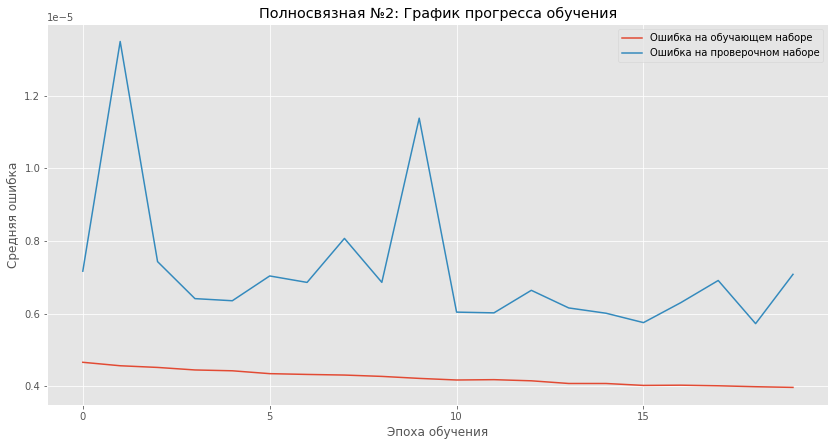

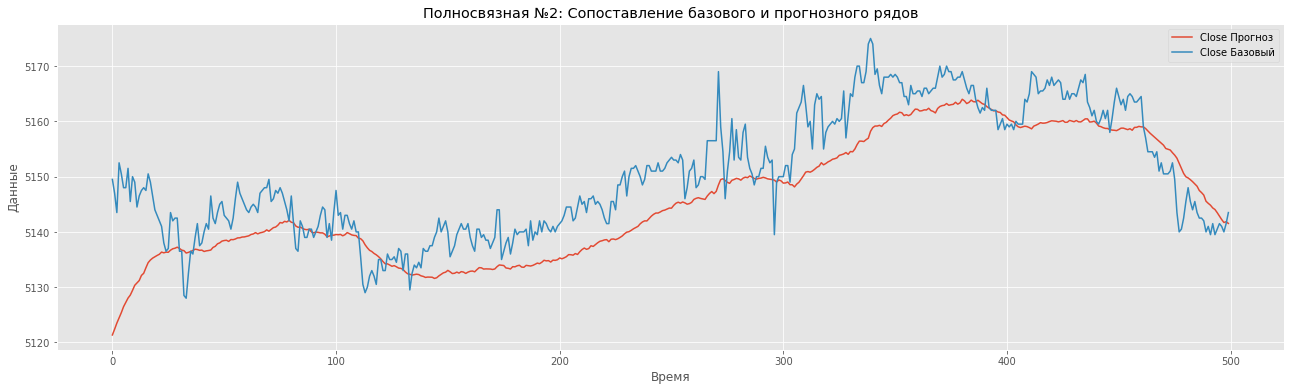

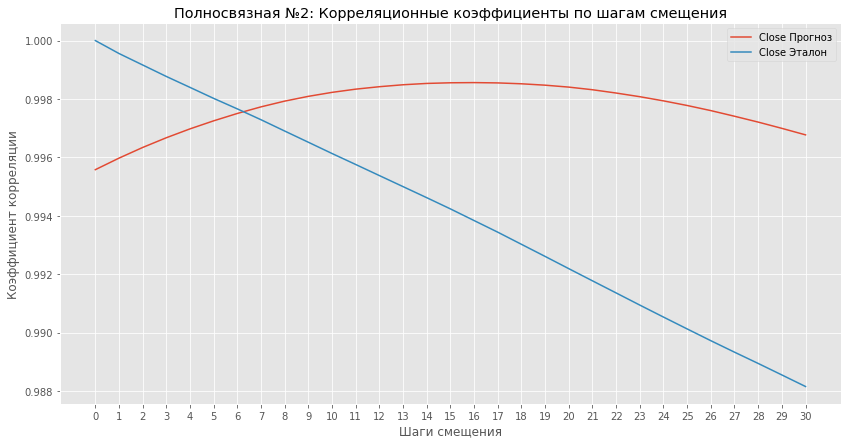

In [ ]:
# Полносвязная сеть с Flatten
model_dense_2 = Sequential()
model_dense_2.add(Flatten(input_shape=x_test.shape[1:]))
model_dense_2.add(Dense(150, activation='relu'))
model_dense_2.add(Dense(y_test.shape[1], activation='linear'))

# Обучение модели 2x20 эпох
train_eval_net(model_dense_2, train_datagen, val_datagen, [(20, Adam(lr=1e-4)),
                                                           (20, Adam(lr=1e-5))],
               x_test, y_test, y_scaler, title='Полносвязная №2')

**Вывод:** в этом случае мы сначала данные развернули в вектор и затем обрабатывали сетью. Так как мы ушли от исходной структуры данных, немного снизилась точность и увеличилась автокорреляция.

### Одномерная свёртка



#### Исследование №1

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 296, 64)           1664      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 292, 64)           20544     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 146, 64)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9344)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               934500    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 956,809
Trainable params: 956,809
Non-trainable params: 0
________________________________________________

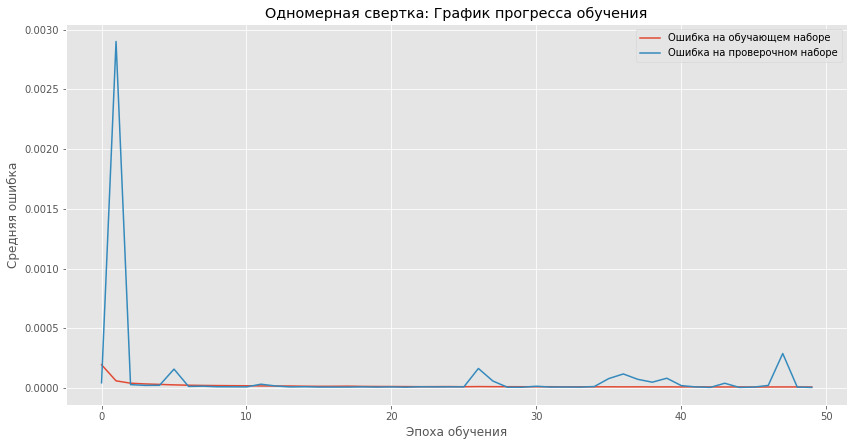

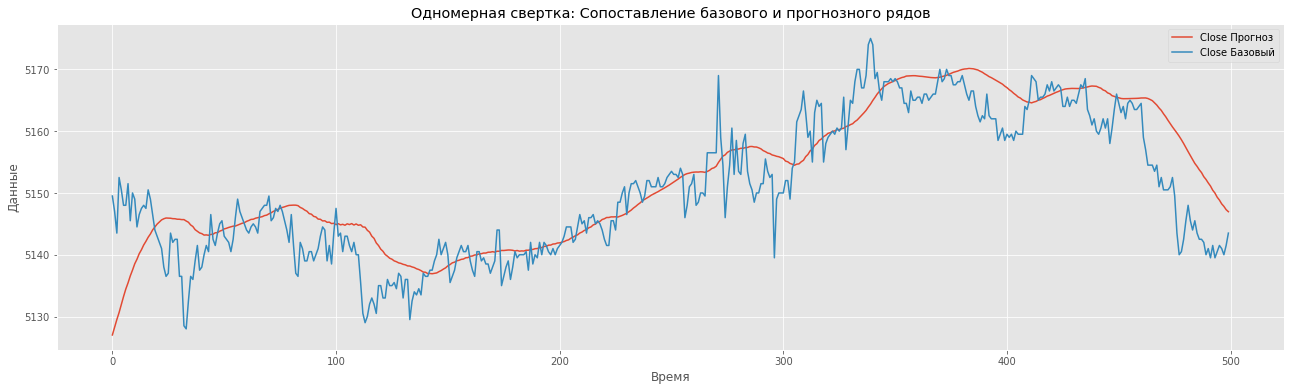

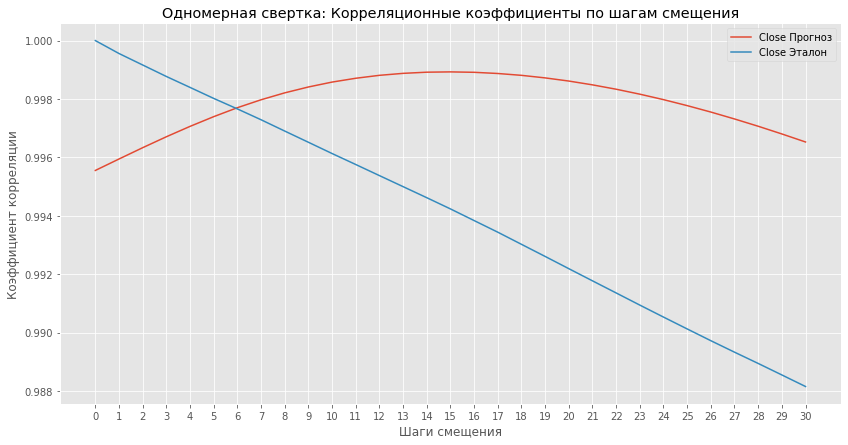

Обучение 20 эпох
Epoch 1/20
22579/22579 [==============================] - 81s 4ms/step - loss: 3.5419e-06 - val_loss: 6.2177e-06
Epoch 2/20
22579/22579 [==============================] - 80s 4ms/step - loss: 3.4748e-06 - val_loss: 8.5111e-06
Epoch 3/20
22579/22579 [==============================] - 80s 4ms/step - loss: 3.4410e-06 - val_loss: 5.7118e-06
Epoch 4/20
22579/22579 [==============================] - 81s 4ms/step - loss: 3.4387e-06 - val_loss: 5.5414e-06
Epoch 5/20
22579/22579 [==============================] - 80s 4ms/step - loss: 3.4185e-06 - val_loss: 6.2864e-06
Epoch 6/20
22579/22579 [==============================] - 80s 4ms/step - loss: 3.4011e-06 - val_loss: 5.3153e-06
Epoch 7/20
22579/22579 [==============================] - 79s 4ms/step - loss: 3.3862e-06 - val_loss: 8.3066e-06
Epoch 8/20
22579/22579 [==============================] - 80s 4ms/step - loss: 3.3930e-06 - val_loss: 5.6253e-06
Epoch 9/20
22579/22579 [==============================] - 79s 3ms/step - loss: 

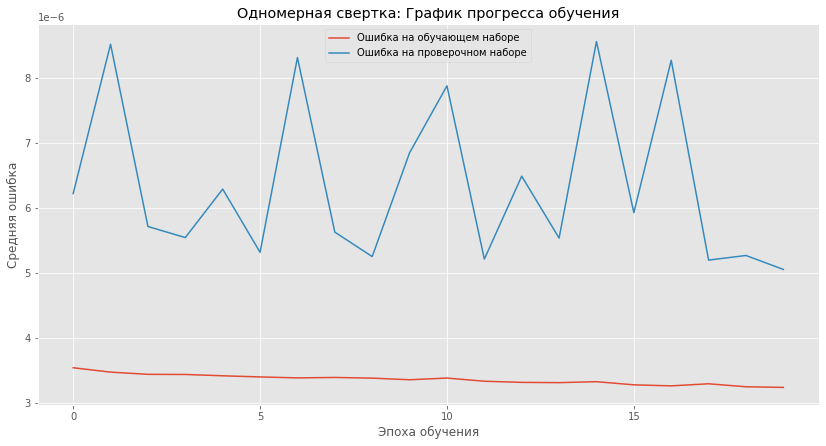

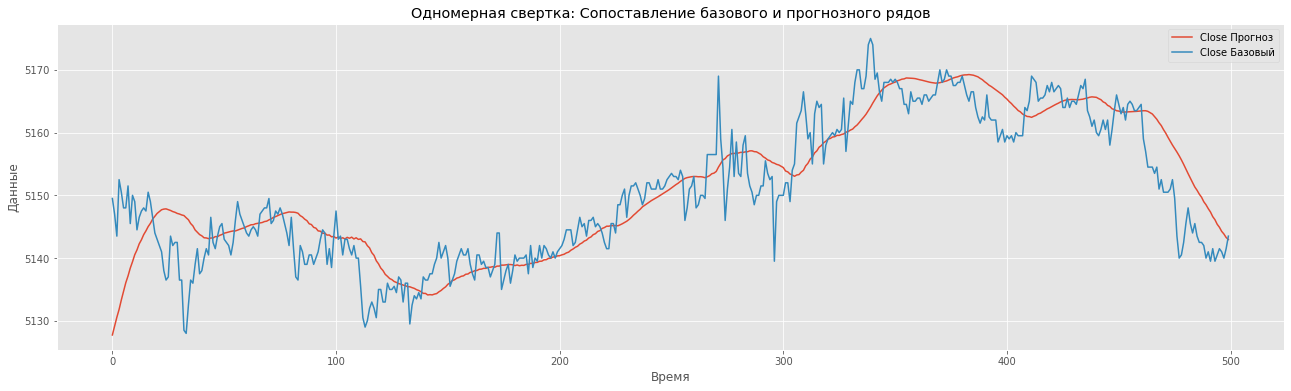

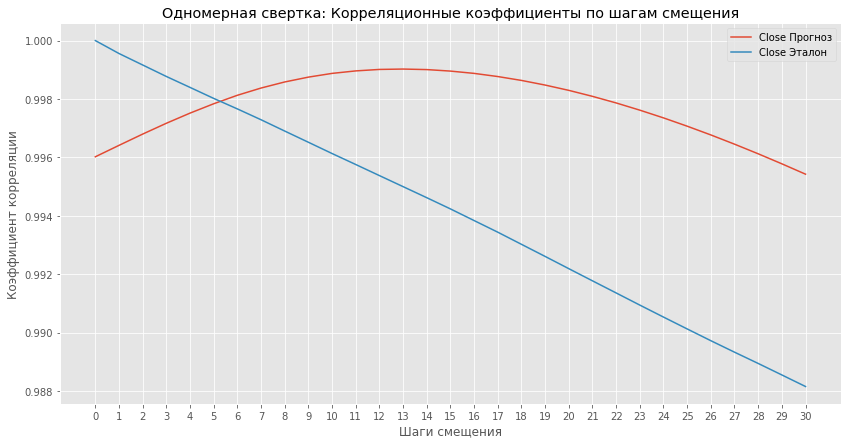

In [ ]:
# Модель с одномерной сверткой
model_conv = Sequential()
model_conv.add(Conv1D(64, 5, input_shape=x_test.shape[1:], activation='relu'))
model_conv.add(Conv1D(64, 5, activation='relu'))
model_conv.add(MaxPooling1D())
model_conv.add(Flatten())
model_conv.add(Dense(100, activation='relu'))
model_conv.add(Dense(y_test.shape[1], activation='linear'))

# Обучение модели 50+20 эпох
train_eval_net(model_conv, train_datagen, val_datagen, [(50, Adam(lr=1e-4)),
                                                        (20, Adam(lr=1e-5))],
               x_test, y_test, y_scaler, title='Одномерная свертка')

**Вывод:** несмотря на то, что мы использовали сверточные слои и более сложную архитектуру, это не принесло результата, точность осталась почти на том же уровне. Но это не говорит о том, что свертки неэффективны для анализа временных рядов, стоит ещё поэкспериментировать с архитектурой.

#### Исследование №2

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 296, 50)           1300      
_________________________________________________________________
flatten_3 (Flatten)          (None, 14800)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                148010    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 149,321
Trainable params: 149,321
Non-trainable params: 0
_________________________________________________________________
Обучение 20 эпох
Epoch 1/20
22579/22579 [==============================] - 50s 2ms/step - loss: 0.0040 - val_loss: 1.2794e-04
Epoch 2/20
22579/22579 [==============================] - 50s 2ms/step - loss: 2.5112e-04 - val_loss: 2.1821e-05
Epoch 3

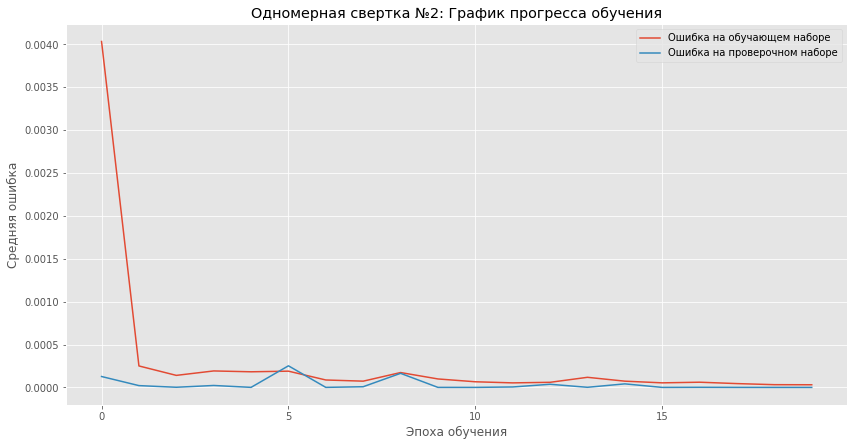

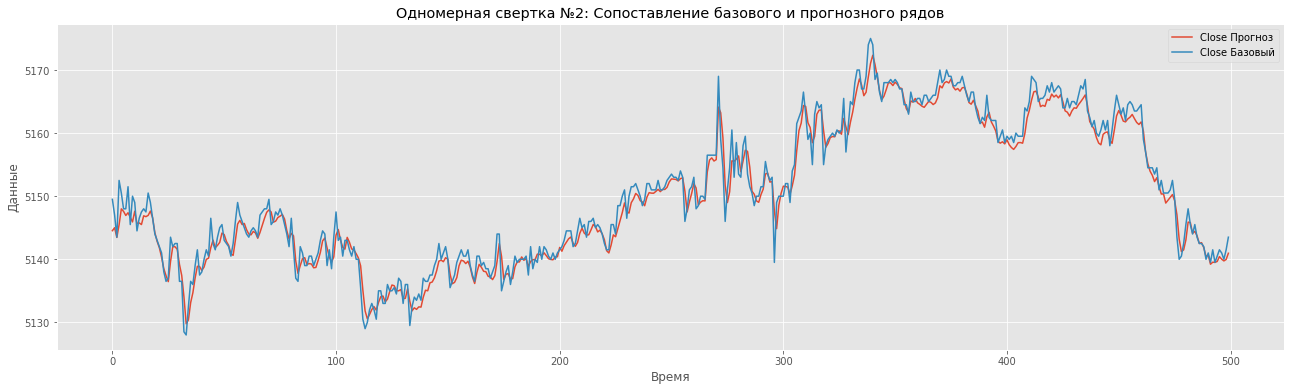

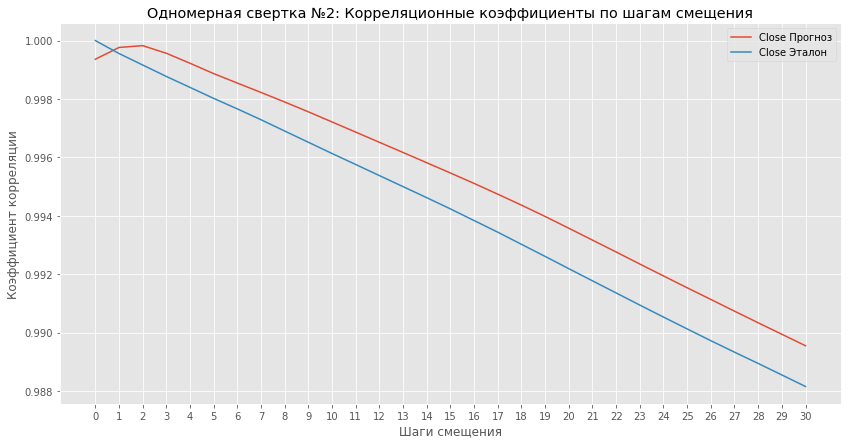

Обучение 20 эпох
Epoch 1/20
22579/22579 [==============================] - 51s 2ms/step - loss: 8.8142e-07 - val_loss: 8.1802e-07
Epoch 2/20
22579/22579 [==============================] - 51s 2ms/step - loss: 7.7319e-07 - val_loss: 6.7572e-07
Epoch 3/20
22579/22579 [==============================] - 51s 2ms/step - loss: 7.5530e-07 - val_loss: 7.4786e-07
Epoch 4/20
22579/22579 [==============================] - 51s 2ms/step - loss: 7.2835e-07 - val_loss: 6.7067e-07
Epoch 5/20
22579/22579 [==============================] - 50s 2ms/step - loss: 7.0005e-07 - val_loss: 6.7514e-07
Epoch 6/20
22579/22579 [==============================] - 50s 2ms/step - loss: 7.0537e-07 - val_loss: 6.4174e-07
Epoch 7/20
22579/22579 [==============================] - 51s 2ms/step - loss: 6.9544e-07 - val_loss: 9.9923e-07
Epoch 8/20
22579/22579 [==============================] - 50s 2ms/step - loss: 6.7778e-07 - val_loss: 5.9520e-06
Epoch 9/20
22579/22579 [==============================] - 51s 2ms/step - loss: 

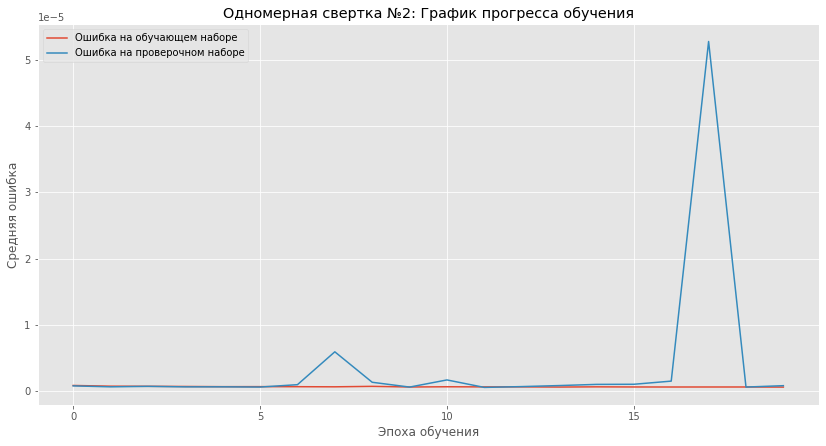

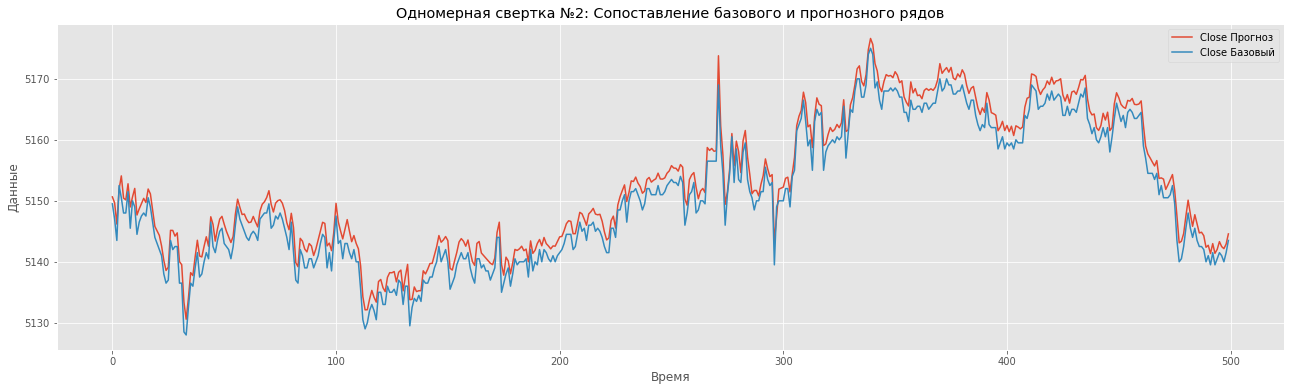

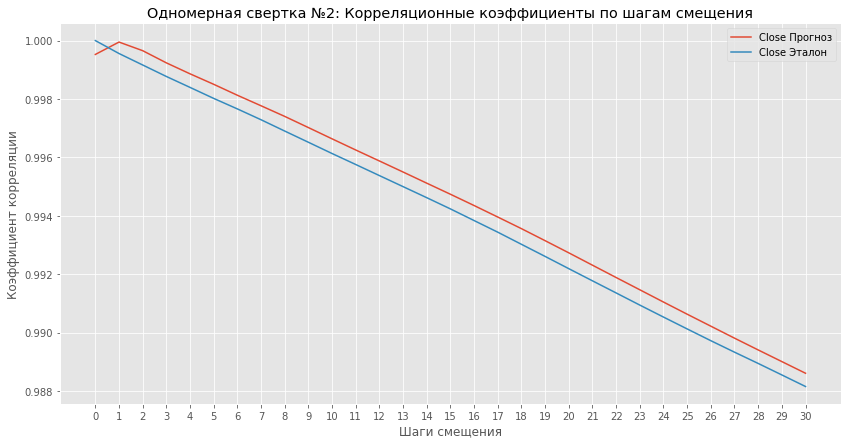

In [ ]:
# Упрощенная модель с одномерной сверткой
model_conv_2 = Sequential()
model_conv_2.add(Conv1D(50, 5, input_shape=x_test.shape[1:], activation='linear'))
model_conv_2.add(Flatten())
model_conv_2.add(Dense(10, activation='linear'))
model_conv_2.add(Dense(y_test.shape[1], activation='linear'))

# Обучение модели 2x20 эпох
train_eval_net(model_conv_2, train_datagen, val_datagen, [(20, Adam(lr=1e-4)),
                                                          (20, Adam(lr=1e-5))],
               x_test, y_test, y_scaler, title='Одномерная свертка №2')

Обратите, пожалуйста, внимание на то, что “холмик” на графике корреляции в районе первых двух шагов говорит о наличии эффекта автокорреляции. В идеале “холмика” быть не должно, а график предсказания должен быть как можно ближе к эталонному.


### Рекуррентная сеть (LSTM)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 220       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________
Обучение 20 эпох
Epoch 1/20
22579/22579 [==============================] - 220s 10ms/step - loss: 0.0278 - val_loss: 8.8373e-04
Epoch 2/20
22579/22579 [==============================] - 220s 10ms/step - loss: 3.5198e-04 - val_loss: 3.9401e-05
Epoch 3/20
22579/22579 [==============================] - 219s 10ms/step - loss: 3.0073e-05 - val_loss: 7.0937e-06
Epoch 4/20
22579/22579 [====

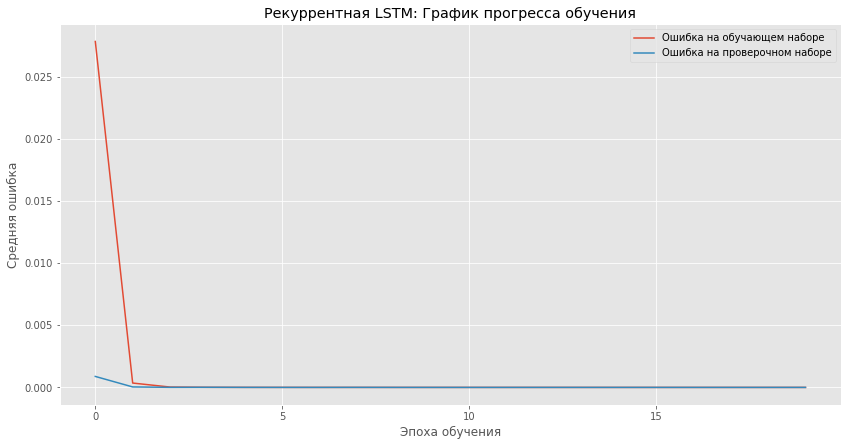

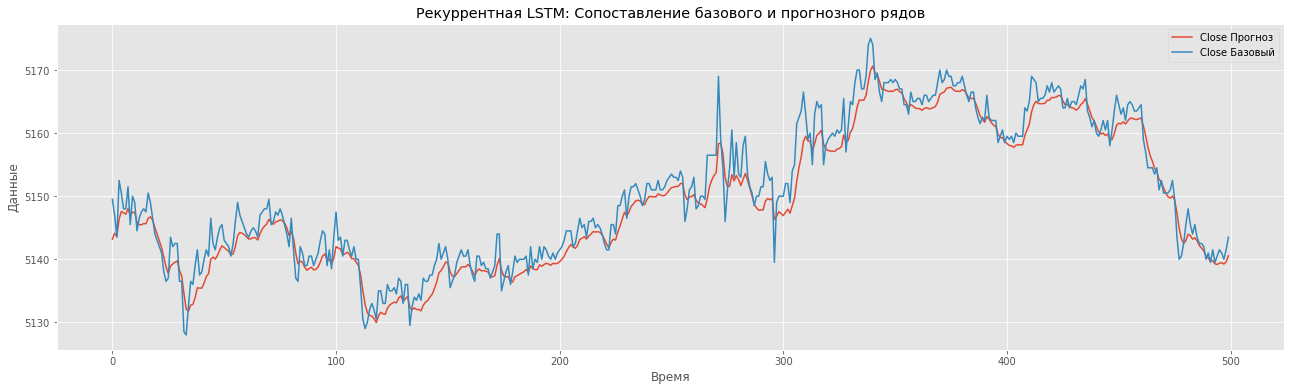

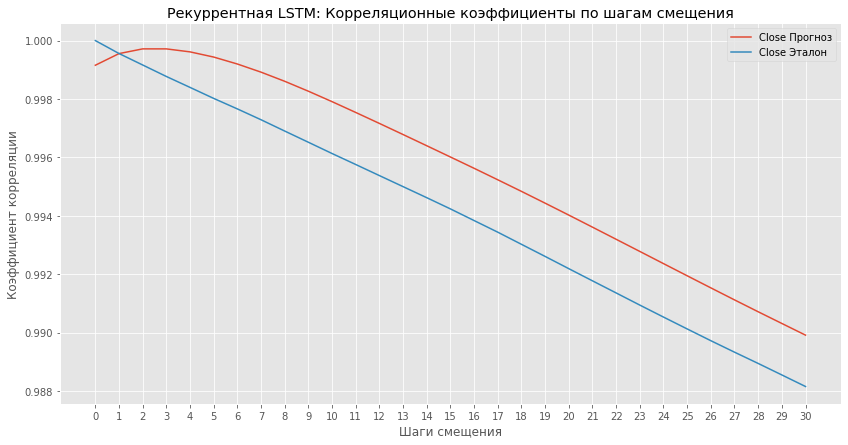

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(5, input_shape=x_test.shape[1:]))
model_lstm.add(Dense(10, activation='relu'))
model_lstm.add(Dense(y_test.shape[1], activation='linear'))

# Обучение модели 20 эпох
train_eval_net(model_lstm, train_datagen, val_datagen, [(20, Adam(lr=1e-5))],
               x_test, y_test, y_scaler, title='Рекуррентная LSTM')

**Вывод**: LSTM-слой является очень тонким инструментом и его применение приносит результат только при тщательной настройке и комбинировании с другими слоями. В данном случае результат значительно хуже сверточной сети.

**Содержание темы**

1. [Теория](https://colab.research.google.com/drive/1i7yg4JvtG_L24T_2VPVTTWlXWrRdgvqQ?usp=sharing)

2. Практический ноутбук 1

3. [Практический ноутбук 2](https://colab.research.google.com/drive/1xnH8OUXgWk9D2zAZsLMAjxsQx8ejmrsz?usp=sharing)
